In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

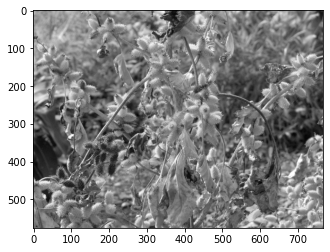

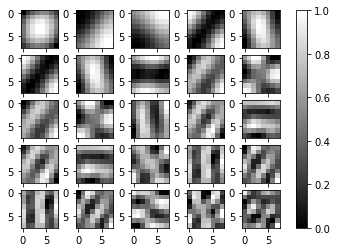

In [111]:
# DATA = 'pixels'
# DATA = 'gratings'
DATA = 'natural'

# METHOD = 'pca'
# METHOD = 'sparse'


# Generate data
if DATA == 'pixels':
    n1 = 16 # image size is n1 * n1
    N = 1500 # number of images
    n = n1**2
    x = np.zeros([N,n1,n1])
    y = np.random.rand(N,n)
    x = -np.log(y)
    x = np.reshape(x,[N,n1,n1])
    x /= np.max(x)

if DATA == 'gratings':
    n1 = 16 # image size is n1 * n1
    N = 1000 # number of images
    n = n1**2
    x = np.zeros([N,n1,n1])
    n2 = 4 # number of grating components
    k = 2*np.pi*np.array([1/2,1/4,1/8,1/16]) # grating wave number
    for i in range(int(N/2)):
        y = np.random.rand(n2)
        a = -np.log(y)
        t = np.outer(k,np.arange(1,n1+1))
        u = np.matmul(a,np.sin(t))
        x[i] = np.outer(np.ones(n1),u)
        x[int(N/2)+i] = np.outer(u,np.ones(n1))
    x /= np.max(x)

if DATA == 'natural':
    I = io.imread('/Users/samsuidman/Desktop/neurophysics/advanced_computational_neuroscience/Week 2 Take Home/sampleMerry_0011_Lasalle.jpeg')
    g = color.rgb2gray(I)
    plt.imshow(g,cmap='gray')
    plt.savefig('test.png')
    a1,a2 = g.shape
    k = 0
    n1 = 8 
    n = n1**2
    N = int(a1*a2/n)
    x = np.zeros([N,n1,n1])
    for i in range(int(a1/n1)): 
        for j in range(int(a2/n1)): 
            x[k] = g[i*n1:(i+1)*n1,j*n1:(j+1)*n1]
            k += 1
    x /=265

X = x.reshape(N,n) # reshape X
X -= np.mean(X,axis=0) # substract mean, such that sum of images for each pixel is zero

C = np.matmul(np.transpose(X),X)/N
w,v = np.linalg.eig(C) # w[i] eigenvalues with orthonormal eigenvectors v[:,i]
i_PCA = np.argsort(w)[-K:][::-1]
v_PCA = v[:,i_PCA] # with v_PCA[:,i] the i'th principle component

a = np.matmul(X,np.transpose(v)) # to get the n weights for all N images 
X_check = np.matmul(a,v) # this way you get back the images via eigenvectors and weights 
np.sum(X_check-X) # this is a test to check that you indeed get back the images with an error around 10^-17 


fig,ax = plt.subplots(nrows=5,ncols=5)
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(v[:,i*3+j].reshape(n1,n1),cmap='gray')
fig.colorbar(plt.cm.ScalarMappable(cmap='gray'),ax=ax)



array([[ 2.30892335e-02,  1.97429569e-02,  1.27149158e-02, ...,
        -8.19834011e-03, -1.15446167e-02, -1.72893873e-17],
       [ 1.97429569e-02,  2.43890860e-02,  2.42068458e-02, ...,
        -1.04568868e-02, -5.81075773e-03, -1.33812640e-17],
       [ 1.27149158e-02,  2.42068458e-02,  3.51571509e-02, ...,
        -1.36540765e-03,  1.01265223e-02, -7.21120783e-18],
       ...,
       [-8.19834011e-03, -1.04568868e-02, -1.36540765e-03, ...,
         2.64973943e-02,  2.42388476e-02,  4.73657038e-18],
       [-1.15446167e-02, -5.81075773e-03,  1.01265223e-02, ...,
         2.42388476e-02,  2.99727066e-02,  8.64469367e-18],
       [-1.72893873e-17, -1.33812640e-17, -7.21120783e-18, ...,
         4.73657038e-18,  8.64469367e-18,  6.29015886e-32]])